In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import fill_between

In [2]:
df = pd.read_csv('Event History of E-Devices.csv')

In [3]:
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ
...,...,...,...,...,...,...,...,...,...
885124,2021-02-28 23:55:01 UTC,view,953226,2144415927553229037,NaN,NaN,219.94,1515915625611023730,FRLqIttxKU
885125,2021-02-28 23:58:05 UTC,view,1715907,2144415927049912542,electronics.video.tv,starwind,80.03,1515915625611024014,g6WqPf50Ma
885126,2021-02-28 23:58:09 UTC,view,4170534,2144415939364389423,electronics.clocks,amazfit,64.92,1515915625611024020,xNIJBqZdkd
885127,2021-02-28 23:58:14 UTC,view,888273,2144415921932861531,electronics.telephone,NaN,10.16,1515915625611024030,9pCbKMIcSx


In [4]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


In [5]:
df.describe()

,product_id,category_id,price,user_id
count,8.851290e+05,8.851290e+05,885129.000000,8.851290e+05
mean,1.906621e+06,2.144423e+18,146.328713,1.515916e+18
std,1.458708e+06,6.165105e+14,296.807683,3.747287e+07
min,1.020000e+02,2.144416e+18,0.220000,1.515916e+18
25%,6.988030e+05,2.144416e+18,26.460000,1.515916e+18
50%,1.452883e+06,2.144416e+18,65.710000,1.515916e+18
75%,3.721194e+06,2.144416e+18,190.490000,1.515916e+18
max,4.183880e+06,2.227847e+18,64771.060000,1.515916e+18


In [6]:
#checking missing values
assert (df.isna().sum() != 0).any()

In [7]:
def count_NaN(column): 
  return column.isnull().sum()

counts = df.apply(count_NaN)
print(counts)

event_time            0
event_type            0
product_id            0
category_id           0
category_code    236219
brand            212364
price                 0
user_id               0
user_session        165
dtype: int64


In [8]:
# droping missed values rows 
df = df.dropna()
assert (df.isna().sum() == 0).all()

In [9]:
print('Rows    :', df.shape[0], '\nColumns :', df.shape[1])

Rows    : 516256 
Columns : 9


In [10]:
#Cleaning Data
df.isnull().sum()

event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
dtype: int64

In [11]:
df = df.drop(columns=['category_id', 'brand'])

In [12]:
# fix index
df = df.reset_index(drop=True)

In [13]:
#extracting the category_code into 3 separate columns (category, subcategory, subsubcategory)
def extract_category_code(df, col):
    def fill_levels(x):
        levels = x.split('.')
        while len(levels) < 3:
            levels.append('0')
        return levels

    df['category'], df['subcategory'], df['subsubcategory'] = zip(*df[col].apply(fill_levels))

In [14]:
extract_category_code(df, 'category_code')

In [15]:
df.head()

,event_time,event_type,product_id,category_code,price,user_id,user_session,category,subcategory,subsubcategory
0,2020-09-24 11:57:26 UTC,view,139905,computers.components.cooler,17.16,1515915625519380411,tdicluNnRY,computers,components,cooler
1,2020-09-24 11:57:33 UTC,view,635807,computers.peripherals.printer,113.81,1515915625519014356,aGFYrNgC08,computers,peripherals,printer
2,2020-09-24 11:57:59 UTC,view,664325,construction.tools.saw,52.33,1515915625519388062,vnkdP81DDW,construction,tools,saw
3,2020-09-24 11:58:24 UTC,view,716611,computers.network.router,53.14,1515915625519388882,kVBeYDPcBw,computers,network,router
4,2020-09-24 11:58:31 UTC,view,716611,computers.network.router,53.14,1515915625519388929,F3VB9LYp39,computers,network,router


In [16]:
#counting completed and incompleted rows as some have only 2 levels
def count_category_periods(df, col):
    count_complete = df[col].apply(lambda x: len(x.split('.')) == 3).sum()
    count_incomplete = df[col].apply(lambda x: len(x.split('.')) < 3).sum()
    return count_complete, count_incomplete

count_complete, count_incomplete = count_category_periods(df, 'category_code')
print('Completed categories   :', count_complete,'\nIncompleted categories :', count_incomplete)  

Completed categories   : 380636 
Incompleted categories : 135206


In [17]:
#dropping incompleted rows
def drop_incomplete_rows(df, col):
    mask = df[col].apply(lambda x: len(x.split('.')) == 3)
    df = df[mask]
    return df
  
ddf = drop_incomplete_rows(df, 'category_code')

In [18]:
#recalculating the completed and incomplted rows
count_complete2, count_incomplete2 = count_category_periods(ddf, 'category_code')
print('New Completed categories   :', count_complete2,'\nNew Incompleted categories :', count_incomplete2)  

New Completed categories   : 380636 
New Incompleted categories : 0


In [19]:
#dropping category_code
df.drop(columns= ['category_code'], inplace=True)

In [20]:
df.head()

,event_time,event_type,product_id,price,user_id,user_session,category,subcategory,subsubcategory
0,2020-09-24 11:57:26 UTC,view,139905,17.16,1515915625519380411,tdicluNnRY,computers,components,cooler
1,2020-09-24 11:57:33 UTC,view,635807,113.81,1515915625519014356,aGFYrNgC08,computers,peripherals,printer
2,2020-09-24 11:57:59 UTC,view,664325,52.33,1515915625519388062,vnkdP81DDW,construction,tools,saw
3,2020-09-24 11:58:24 UTC,view,716611,53.14,1515915625519388882,kVBeYDPcBw,computers,network,router
4,2020-09-24 11:58:31 UTC,view,716611,53.14,1515915625519388929,F3VB9LYp39,computers,network,router


In [21]:
df = df.astype({"category": "category", "subcategory": "category", "subsubcategory": "category" })

In [22]:
df.dtypes

event_time          object
event_type          object
product_id           int64
price              float64
user_id              int64
user_session        object
category          category
subcategory       category
subsubcategory    category
dtype: object

In [23]:
category = df["category"].nunique()
subcategory = df["subcategory"].nunique()
subsubcategory = df["subsubcategory"].nunique()
print( 'Categories       :', category, '\nSubCategories.   :',subcategory, '\nSubSubCategories :',subsubcategory)

Categories       : 14 
SubCategories.   : 40 
SubSubCategories : 78


In [24]:
#number of products in categories
print(df.groupby('category')['product_id'].agg('nunique').sort_values(ascending=False))

category
computers       9156
electronics     7386
appliances      2803
stationery      2079
construction    1353
auto             863
accessories      393
country_yard     122
kids              33
medicine          19
furniture         18
jewelry           15
apparel           10
sport              5
Name: product_id, dtype: int64


In [25]:
#number of purchases in each category
print(df.loc[df['event_type'] == 'purchase'].groupby('category')['product_id'].agg('nunique').sort_values(ascending=False))

category
computers       1572
electronics      796
stationery       327
appliances       165
auto             150
construction     150
accessories       27
country_yard      12
kids               5
medicine           5
sport              1
apparel            0
furniture          0
jewelry            0
Name: product_id, dtype: int64


In [26]:
# Select only categories with more than 100 unique product purchases
categories_to_keep = df.loc[df['event_type'] == 'purchase'].groupby('category')['product_id'].nunique()
categories_to_keep = categories_to_keep[categories_to_keep > 100].index# Select only categories with more than 100 unique product purchases
categories_to_keep = df.loc[df['event_type'] == 'purchase'].groupby('category')['product_id'].nunique()
categories_to_keep = categories_to_keep[categories_to_keep > 100].index

In [27]:
# Filter the DataFrame to keep only the categories with more than 100 unique product purchases
df = df[df['category'].isin(categories_to_keep)]

# Convert 'category_code' column to categorical data type
df['category'] = df['category'].astype('category')

# Remove unused categories
df['category'] = df['category'].cat.remove_unused_categories()

In [28]:
# After filtering, print the count of unique product purchases by category
print(df.loc[df['event_type'] == 'purchase'].groupby('category')['product_id'].agg('nunique').sort_values(ascending=False))

category
computers       1572
electronics      796
stationery       327
appliances       165
auto             150
construction     150
Name: product_id, dtype: int64


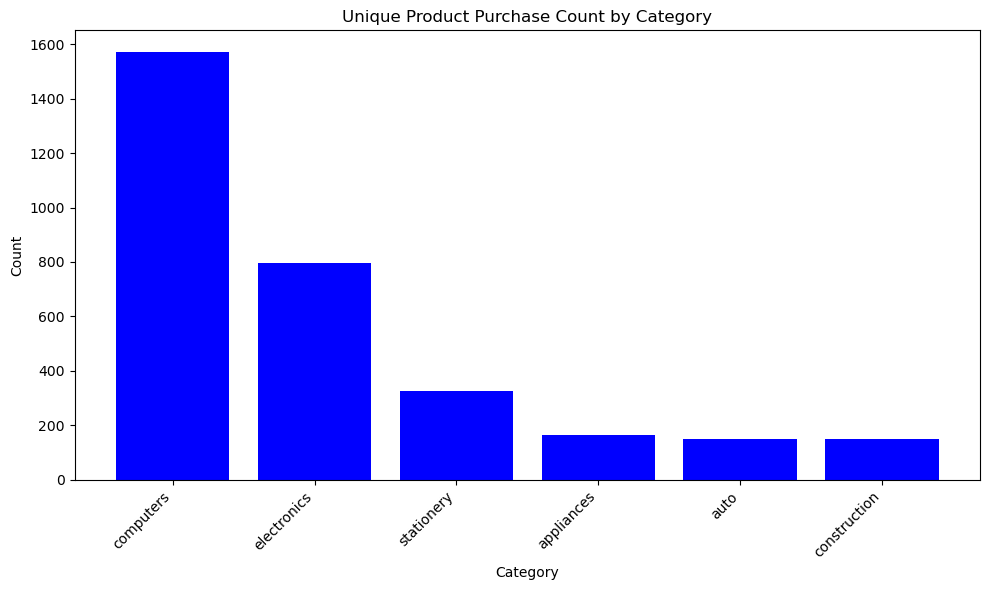

In [29]:
# Group by category and count unique product purchases
counts = df.loc[df['event_type'] == 'purchase'].groupby('category')['product_id'].agg('nunique').sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6)) 
plt.bar(counts.index, counts, color='blue')
plt.xlabel('Category')  
plt.ylabel('Count')  
plt.title('Unique Product Purchase Count by Category')  
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

In [30]:
#subcategory
len(df['subcategory'].unique())

27

In [31]:
print(df.loc[df['event_type'] == 'purchase'].groupby('subcategory')['product_id'].agg('nunique').sort_values(ascending=False))

subcategory
components         676
peripherals        523
telephone          353
notebook           296
cartrige           289
audio              228
accessories        150
tools              150
video               97
tablet              83
kitchen             74
environment         54
desktop             37
network             28
paper               27
camera              20
sewing_machine      16
ebooks              11
personal            10
clocks              10
battery              9
steam_cleaner        6
iron                 5
calculator           5
stapler              2
gaming               1
watering             0
bag                  0
toys                 0
bathroom             0
bedroom              0
souvenir             0
lawn_mower           0
skates               0
fax                  0
bicycle              0
cultivator           0
glove                0
living_room          0
weather_station      0
Name: product_id, dtype: int64


In [32]:
# Select only categories with more than 100 unique product purchases
categories_to_keep = df.loc[df['event_type'] == 'purchase'].groupby('subcategory')['product_id'].nunique()
categories_to_keep = categories_to_keep[categories_to_keep > 100].index# Select only categories with more than 100 unique product purchases
categories_to_keep = df.loc[df['event_type'] == 'purchase'].groupby('subcategory')['product_id'].nunique()
categories_to_keep = categories_to_keep[categories_to_keep > 100].index

In [33]:
# Filter the DataFrame to keep only the categories with more than 100 unique product purchases
df = df[df['subcategory'].isin(categories_to_keep)]

# Convert 'category_code' column to categorical data type
df['subcategory'] = df['subcategory'].astype('category')

# Remove unused categories
df['subcategory'] = df['subcategory'].cat.remove_unused_categories()

In [34]:
# After filtering, print the count of unique product purchases by category
print(df.loc[df['event_type'] == 'purchase'].groupby('subcategory')['product_id'].agg('nunique').sort_values(ascending=False))

subcategory
components     676
peripherals    523
telephone      353
notebook       296
cartrige       289
audio          228
accessories    150
tools          150
Name: product_id, dtype: int64


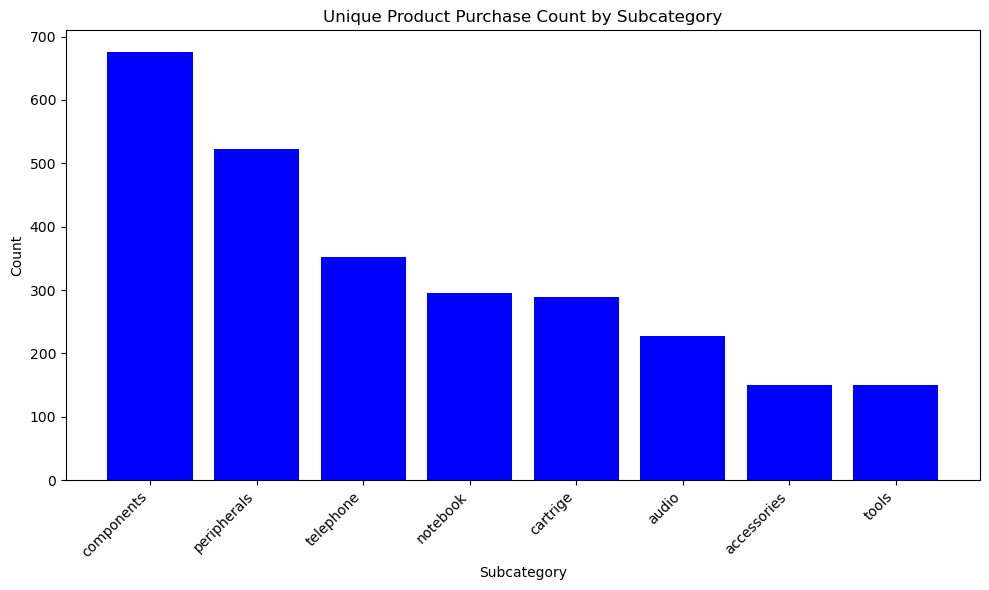

In [35]:
# Group by subcategory and count unique product purchases
counts = df.loc[df['event_type'] == 'purchase'].groupby('subcategory')['product_id'].agg('nunique').sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6)) 
plt.bar(counts.index, counts, color='blue')
plt.xlabel('Subcategory')  
plt.ylabel('Count')  
plt.title('Unique Product Purchase Count by Subcategory')  
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

In [36]:
print(df.groupby('subsubcategory')['product_id'].agg('nunique').sort_values(ascending=False))

subsubcategory
0                6538
printer          1439
acoustic         1401
headphone         813
monitor           680
                 ... 
projector           0
refrigerators       0
kettle              0
scales              0
router              0
Name: product_id, Length: 78, dtype: int64


In [37]:
# Select only categories with more than 100 unique products
categories_to_keep = df.groupby('subsubcategory')['product_id'].nunique()
categories_to_keep = categories_to_keep[categories_to_keep > 100].index# Select only categories with more than 100 unique product purchases
categories_to_keep = df.groupby('subsubcategory')['product_id'].nunique()
categories_to_keep = categories_to_keep[categories_to_keep > 100].index

In [38]:
# Filter the DataFrame to keep only the categories with more than 100 unique product purchases
df = df[df['subsubcategory'].isin(categories_to_keep)]

# Convert 'category_code' column to categorical data type
df['subsubcategory'] = df['subsubcategory'].astype('category')

# Remove unused categories
df['subsubcategory'] = df['subsubcategory'].cat.remove_unused_categories()

In [39]:
# After filtering, print the count of unique product purchases by category
print(df.groupby('subsubcategory')['product_id'].agg('nunique').sort_values(ascending=False))

subsubcategory
0                  6538
printer            1439
acoustic           1401
headphone           813
monitor             680
hdd                 652
mouse               570
videocards          533
wifi                457
power_supply        447
cooler              428
player              402
motherboard         399
drill               398
light               345
cpu                 298
videoregister       248
keyboard            218
saw                 179
network_adapter     146
screw               145
joystick            144
Name: product_id, dtype: int64


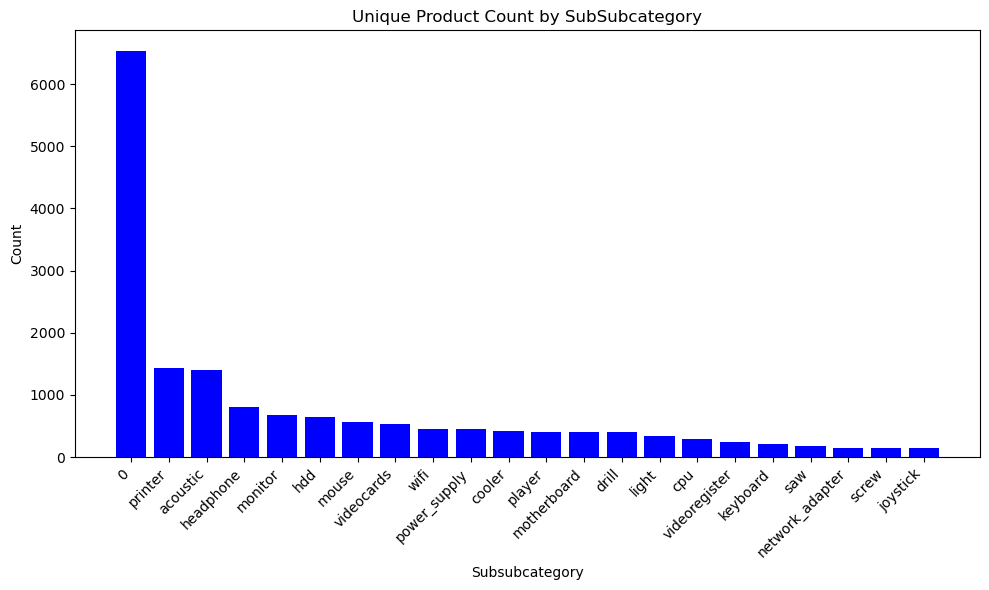

In [40]:
# Group by subsubcategory and count unique product purchases
counts = df.groupby('subsubcategory')['product_id'].agg('nunique').sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6)) 
plt.bar(counts.index, counts, color='blue')
plt.xlabel('Subsubcategory')  
plt.ylabel('Count')  
plt.title('Unique Product Count by SubSubcategory')  
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

In [41]:
df.head()

,event_time,event_type,product_id,price,user_id,user_session,category,subcategory,subsubcategory
0,2020-09-24 11:57:26 UTC,view,139905,17.16,1515915625519380411,tdicluNnRY,computers,components,cooler
1,2020-09-24 11:57:33 UTC,view,635807,113.81,1515915625519014356,aGFYrNgC08,computers,peripherals,printer
2,2020-09-24 11:57:59 UTC,view,664325,52.33,1515915625519388062,vnkdP81DDW,construction,tools,saw
5,2020-09-24 12:00:00 UTC,view,1080093,268.17,1515915625519389483,63xjTFC54g,computers,peripherals,printer
7,2020-09-24 12:00:10 UTC,view,3537266,92.00,1515915625519389538,FwLEmI1E0K,auto,accessories,player


In [42]:
#event

def get_event_categories(event):
    categories = { 'is_view': 0, 'is_cart': 0, 'is_purchase': 0 }
    if event == 'view':
        categories['is_view'] = 1
    elif event == 'cart':
        categories['is_cart'] = 1
    elif event == 'purchase':
        categories['is_purchase'] = 1

    return categories

df[[ 'is_view', 'is_cart','is_purchase']] = df['event_type'].apply(lambda x: pd.Series(get_event_categories(x), index=[ 'is_view', 'is_cart','is_purchase']))

In [43]:
df.head()

,event_time,event_type,product_id,price,user_id,user_session,category,subcategory,subsubcategory,is_view,is_cart,is_purchase
0,2020-09-24 11:57:26 UTC,view,139905,17.16,1515915625519380411,tdicluNnRY,computers,components,cooler,1,0,0
1,2020-09-24 11:57:33 UTC,view,635807,113.81,1515915625519014356,aGFYrNgC08,computers,peripherals,printer,1,0,0
2,2020-09-24 11:57:59 UTC,view,664325,52.33,1515915625519388062,vnkdP81DDW,construction,tools,saw,1,0,0
5,2020-09-24 12:00:00 UTC,view,1080093,268.17,1515915625519389483,63xjTFC54g,computers,peripherals,printer,1,0,0
7,2020-09-24 12:00:10 UTC,view,3537266,92.00,1515915625519389538,FwLEmI1E0K,auto,accessories,player,1,0,0


In [44]:
#counting columns
view_count = df['is_view'].sum()
cart_count = df['is_cart'].sum()
purchase_count = df['is_purchase'].sum()

In [45]:
print('Views     :',view_count, '\nCarts     :',cart_count, '\nPurchases :', purchase_count)

Views     : 343112 
Carts     : 29521 
Purchases : 19257


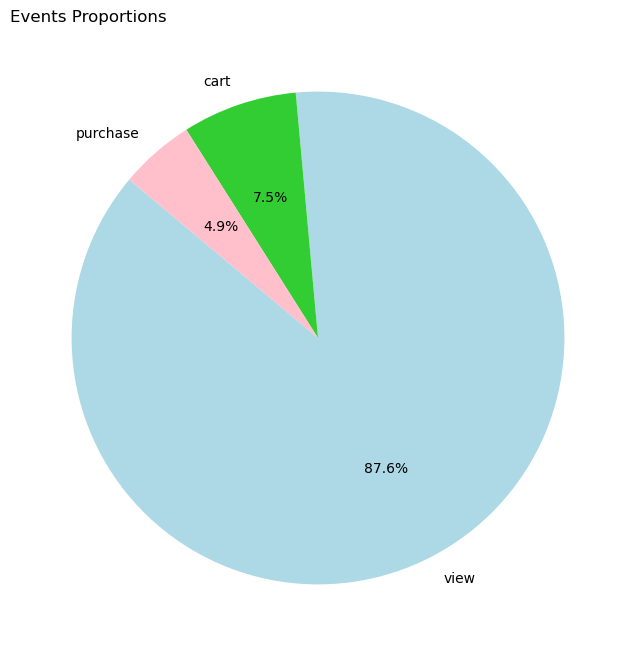

In [46]:
x= ['view','cart','purchase']
y= [view_count, cart_count, purchase_count]

# Create a pie chart
plt.figure(figsize=(8, 8)) 
plt.pie(y, labels=x, autopct='%1.1f%%', colors=['lightblue', 'limegreen', 'pink'], startangle=140)
plt.title('Events Proportions', loc='left')  # Set the title
plt.show()

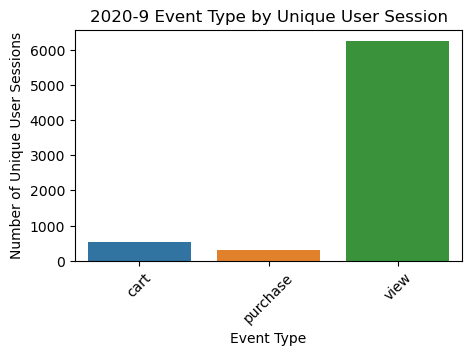

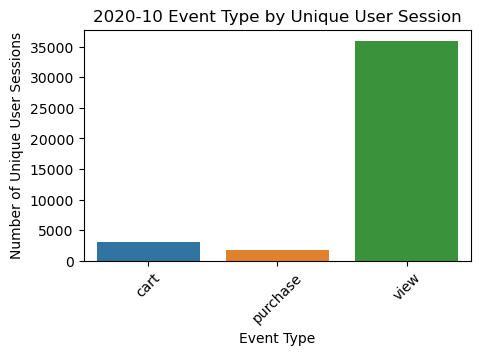

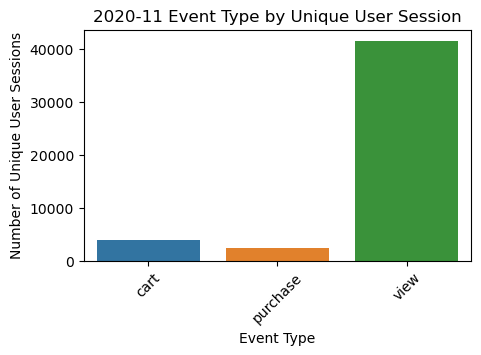

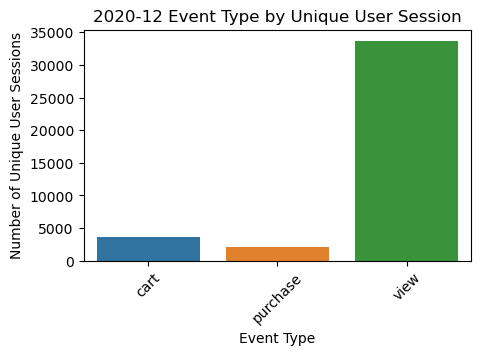

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

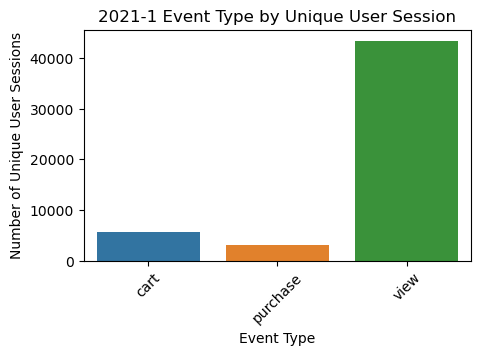

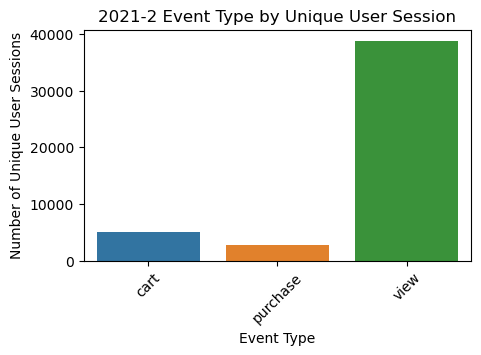

In [47]:
# Convert event_time to datetime 
df['event_time'] = pd.to_datetime(df['event_time'])

# Extract month and year from event_time
df['Month'] = df['event_time'].dt.month
df['Year'] = df['event_time'].dt.year

# Group by month, year, and event type and count unique user sessions
monthly_event_counts = df.groupby(['Year', 'Month', 'event_type'])['user_session'].nunique().reset_index()

# Creating bar charts
for year in df['Year'].unique():
    for month in df['Month'].unique():
        plt.figure(figsize=(5, 3))
        subset = monthly_event_counts[(monthly_event_counts['Year'] == year) & (monthly_event_counts['Month'] == month)]
        if not subset.empty:
            sns.barplot(x='event_type', y='user_session', data=subset)
            plt.title(f'{year}-{month} Event Type by Unique User Session')
            plt.xlabel('Event Type')
            plt.ylabel('Number of Unique User Sessions')
            plt.xticks(rotation=45)
            plt.show()

<Figure size 1200x600 with 0 Axes>

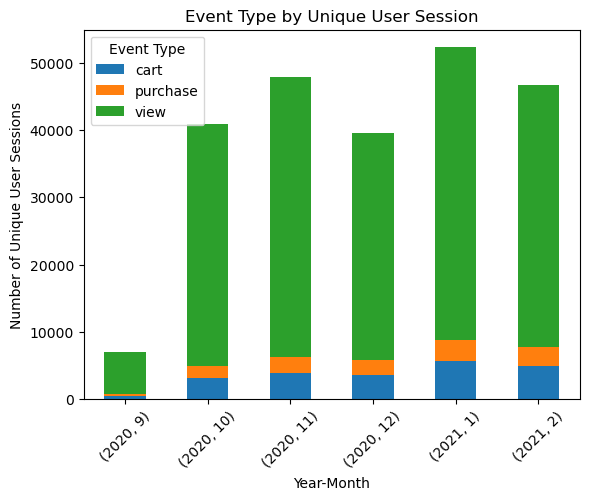

In [48]:
# Group by year, month, and event type and count unique user sessions
monthly_event_counts = df.groupby(['Year', 'Month', 'event_type'])['user_session'].nunique().reset_index()

# Pivot the data to have event types as columns
monthly_event_counts_pivot = monthly_event_counts.pivot_table(index=['Year', 'Month'], columns='event_type', values='user_session', fill_value=0)

# Creating Graph
plt.figure(figsize=(12, 6))
monthly_event_counts_pivot.plot(kind='bar', stacked=True)
plt.title('Event Type by Unique User Session')
plt.xlabel('Year-Month')
plt.ylabel('Number of Unique User Sessions')
plt.xticks(rotation=45)
plt.legend(title='Event Type')
plt.show()

In [49]:
#time splitter
dft = df

In [50]:
dft['event_time'] =  pd.to_datetime(dft['event_time'])
dft['Date'] = dft['event_time'].dt.date
dft['Time'] = dft['event_time'].dt.time

In [51]:
dft.head()

,event_time,event_type,product_id,price,user_id,user_session,category,subcategory,subsubcategory,is_view,is_cart,is_purchase,Month,Year,Date,Time
0,2020-09-24 11:57:26+00:00,view,139905,17.16,1515915625519380411,tdicluNnRY,computers,components,cooler,1,0,0,9,2020,2020-09-24,11:57:26
1,2020-09-24 11:57:33+00:00,view,635807,113.81,1515915625519014356,aGFYrNgC08,computers,peripherals,printer,1,0,0,9,2020,2020-09-24,11:57:33
2,2020-09-24 11:57:59+00:00,view,664325,52.33,1515915625519388062,vnkdP81DDW,construction,tools,saw,1,0,0,9,2020,2020-09-24,11:57:59
5,2020-09-24 12:00:00+00:00,view,1080093,268.17,1515915625519389483,63xjTFC54g,computers,peripherals,printer,1,0,0,9,2020,2020-09-24,12:00:00
7,2020-09-24 12:00:10+00:00,view,3537266,92.00,1515915625519389538,FwLEmI1E0K,auto,accessories,player,1,0,0,9,2020,2020-09-24,12:00:10


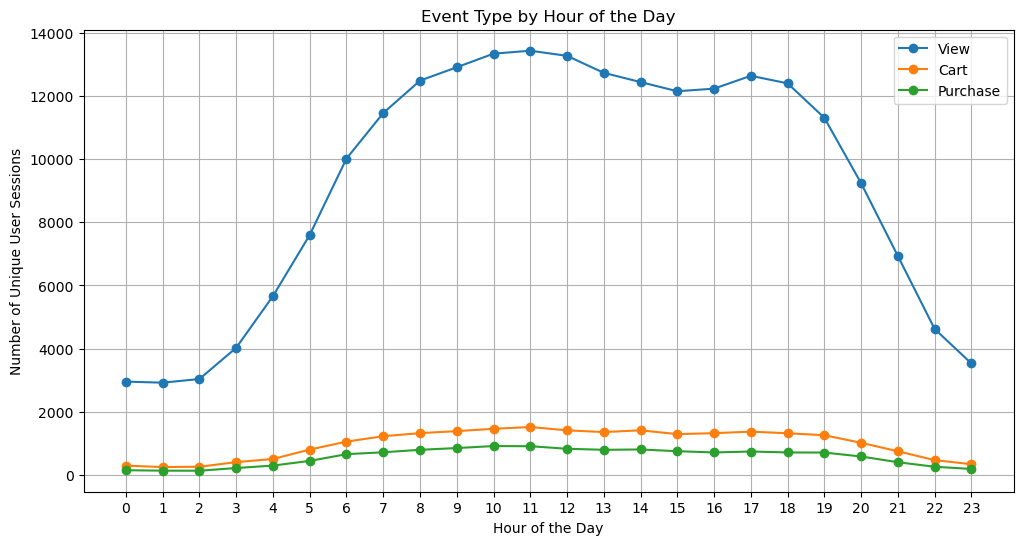

In [52]:
# Extract hour of the day from event_time
df['Hour_of_day'] = df['event_time'].dt.hour

# Group by hour of the day and event type, count unique user sessions
hourly_event_counts = df.groupby(['Hour_of_day', 'event_type'])['user_session'].nunique().reset_index()

# Pivot the data to have event types as columns
hourly_event_counts_pivot = hourly_event_counts.pivot(index='Hour_of_day', columns='event_type', values='user_session').fillna(0)

# Creating Graph
plt.figure(figsize=(12, 6))
plt.plot(hourly_event_counts_pivot.index, hourly_event_counts_pivot['view'], marker='o', label='View')
plt.plot(hourly_event_counts_pivot.index, hourly_event_counts_pivot['cart'], marker='o', label='Cart')
plt.plot(hourly_event_counts_pivot.index, hourly_event_counts_pivot['purchase'], marker='o', label='Purchase')
plt.title('Event Type by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Unique User Sessions')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()

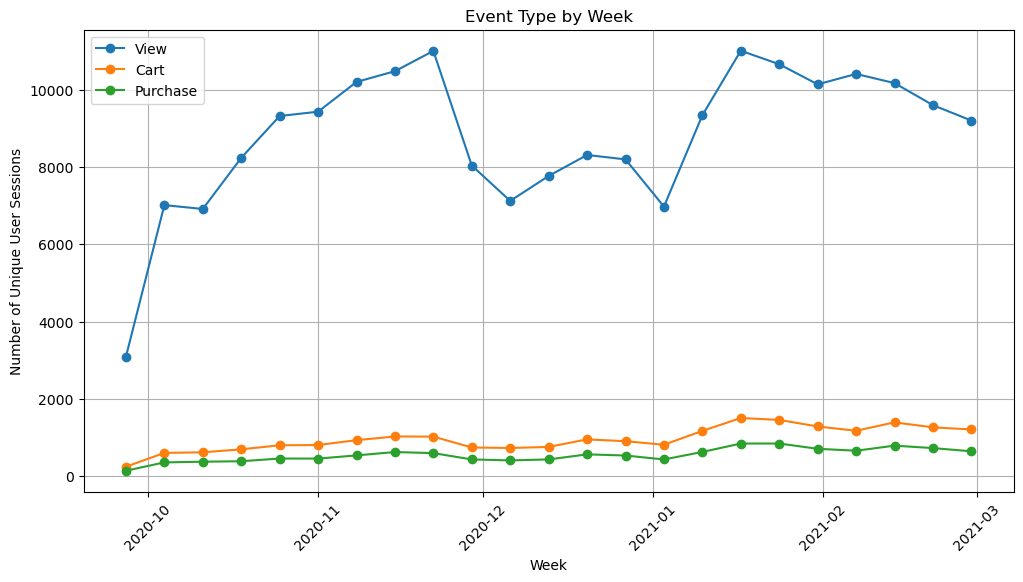

In [53]:
# Group by week, event type, and count unique user sessions
weekly_event_counts = df.groupby([pd.Grouper(key='event_time', freq='W'), 'event_type'])['user_session'].nunique().reset_index()

# Pivot the data to have event types as columns
weekly_event_counts_pivot = weekly_event_counts.pivot_table(index='event_time', columns='event_type', values='user_session', fill_value=0).reset_index()

# Graph
plt.figure(figsize=(12, 6))
plt.plot(weekly_event_counts_pivot['event_time'], weekly_event_counts_pivot['view'], marker='o', label='View')
plt.plot(weekly_event_counts_pivot['event_time'], weekly_event_counts_pivot['cart'], marker='o', label='Cart')
plt.plot(weekly_event_counts_pivot['event_time'], weekly_event_counts_pivot['purchase'], marker='o', label='Purchase')
plt.title('Event Type by Week')
plt.xlabel('Week')
plt.ylabel('Number of Unique User Sessions')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [54]:
#the number of each event by product and the number of each by user 
user_product_event = df.loc[:, ['category','user_id','product_id','event_type','subsubcategory', 'is_view','is_cart', 'is_purchase']]
user_product_event.head()

,category,user_id,product_id,event_type,subsubcategory,is_view,is_cart,is_purchase
0,computers,1515915625519380411,139905,view,cooler,1,0,0
1,computers,1515915625519014356,635807,view,printer,1,0,0
2,construction,1515915625519388062,664325,view,saw,1,0,0
5,computers,1515915625519389483,1080093,view,printer,1,0,0
7,auto,1515915625519389538,3537266,view,player,1,0,0


In [55]:
#counting events for products
def event_count(group):
    purchase_s = (group['event_type'] == 'purchase').sum() 
    cart_s = (group['event_type'] == 'cart').sum() 
    view_s = (group['event_type'] == 'view').sum()
    return pd.Series({'purchases':purchase_s, 'carts':cart_s, 'views':view_s})

In [56]:
product_event_story = user_product_event.groupby('product_id').apply(event_count).reset_index()
product_event_story.head()

,product_id,purchases,carts,views
0,854,7,0,2
1,1245,0,0,6
2,1564,0,0,15
3,1572,0,0,24
4,1575,0,0,14


In [57]:
product_event_story.describe()

,product_id,purchases,carts,views
count,1.688000e+04,16880.000000,16880.000000,16880.000000
mean,1.729220e+06,1.140818,1.748874,20.326540
std,1.339323e+06,10.211445,16.484465,121.977794
min,8.540000e+02,0.000000,0.000000,1.000000
25%,7.874740e+05,0.000000,0.000000,1.000000
50%,1.271552e+06,0.000000,0.000000,3.000000
75%,3.506266e+06,0.000000,0.000000,10.000000
max,4.183866e+06,564.000000,1033.000000,5721.000000


In [58]:
for x in ['purchases', 'carts', 'views'] : 
    print('max', x,'by product:', product_event_story[x].max())

max purchases by product: 564
max carts by product: 1033
max views by product: 5721


In [59]:
#counting events for each user
user_event_story = user_product_event.groupby('user_id').apply(event_count).reset_index() 
user_event_story.head()

,user_id,purchases,carts,views
0,1515915625353230683,0,0,13
1,1515915625353230922,0,0,1
2,1515915625353234047,0,0,35
3,1515915625353286099,1,2,8
4,1515915625353294441,0,0,40


In [60]:
for x in ['purchases', 'carts', 'views'] : print( 'max',x, 'by user  :', user_event_story[x].max())

max purchases by user  : 56
max carts by user  : 68
max views by user  : 326


In [61]:
dff = dft.reindex(columns=['Date','Time', 'event_type' , 'user_id', 'user_session', 'product_id', 'price', 'category','subcategory', 'subsubcategory', 'is_view', 'is_cart', 'is_purchase'])
dff.head()

,Date,Time,event_type,user_id,user_session,product_id,price,category,subcategory,subsubcategory,is_view,is_cart,is_purchase
0,2020-09-24,11:57:26,view,1515915625519380411,tdicluNnRY,139905,17.16,computers,components,cooler,1,0,0
1,2020-09-24,11:57:33,view,1515915625519014356,aGFYrNgC08,635807,113.81,computers,peripherals,printer,1,0,0
2,2020-09-24,11:57:59,view,1515915625519388062,vnkdP81DDW,664325,52.33,construction,tools,saw,1,0,0
5,2020-09-24,12:00:00,view,1515915625519389483,63xjTFC54g,1080093,268.17,computers,peripherals,printer,1,0,0
7,2020-09-24,12:00:10,view,1515915625519389538,FwLEmI1E0K,3537266,92.00,auto,accessories,player,1,0,0


In [62]:
#Effectiveness of products(purchases for each product)
product_event_story['conversion_rate'] = product_event_story['purchases'] / product_event_story['views']
product_event_story['conversion_rate']

0        3.500000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
16875    0.060000
16876    0.044416
16877    0.042484
16878    0.029412
16879    0.048780
Name: conversion_rate, Length: 16880, dtype: float64

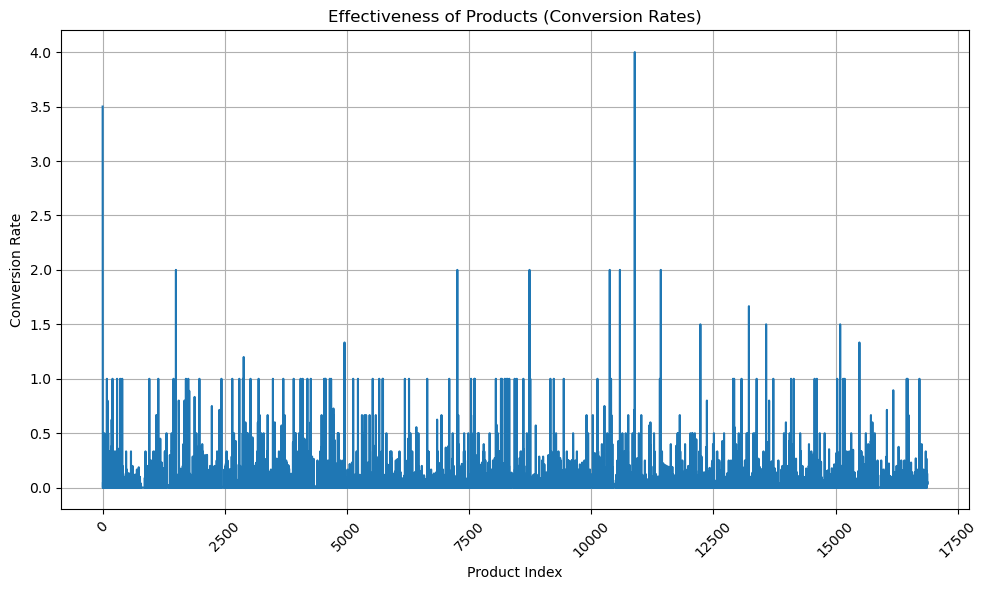

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(product_event_story.index, product_event_story['conversion_rate'], linestyle='-')
plt.title('Effectiveness of Products (Conversion Rates)')
plt.xlabel('Product Index')  # Assuming 'product_event_story' has index as product index
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [64]:
#Effectiveness of individual users(purchases of each user)
user_event_story['conversion_rate'] = user_event_story['purchases'] / user_event_story['views']
user_event_story['conversion_rate']

0         0.000
1         0.000
2         0.000
3         0.125
4         0.000
          ...  
160409    0.000
160410    0.000
160411    0.000
160412    0.000
160413    0.000
Name: conversion_rate, Length: 160414, dtype: float64

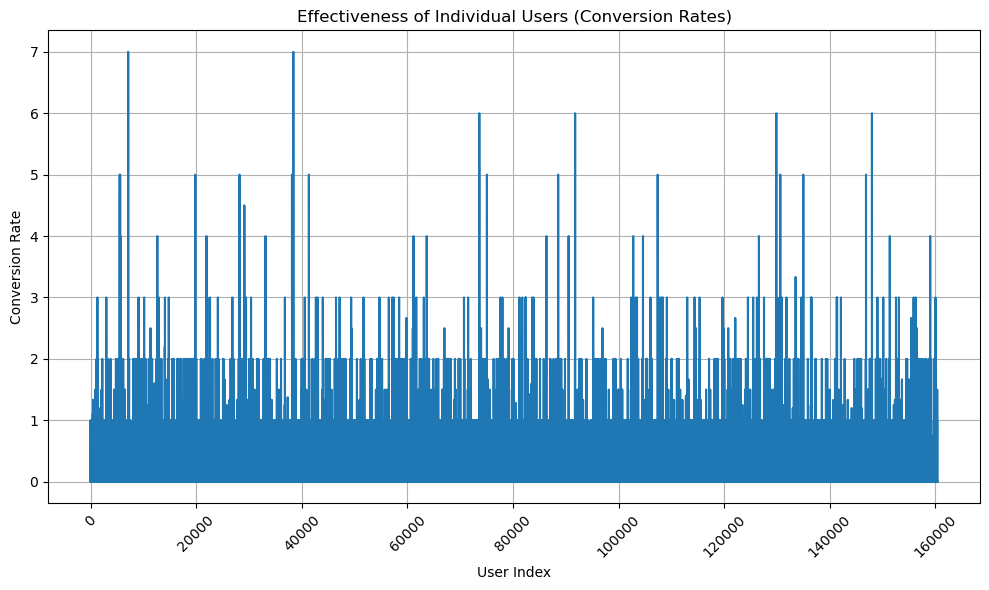

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(user_event_story.index, user_event_story['conversion_rate'],linestyle='-')
plt.title('Effectiveness of Individual Users (Conversion Rates)')
plt.xlabel('User Index')  # Assuming 'user_event_story' has index as user index
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [67]:
# Prepare data for modeling
X = user_event_story[['views', 'carts']]
y = user_event_story['purchases']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict purchases on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.931614873920768


E:\Programmes\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
# Calculate conversion rates through the funnel
funnel_data = df.groupby('event_type')['user_session'].nunique()
view_to_cart_rate = funnel_data['cart'] / funnel_data['view']
cart_to_purchase_rate = funnel_data['purchase'] / funnel_data['cart']
print("View to Cart Conversion Rate:", view_to_cart_rate)
print("Cart to Purchase Conversion Rate:", cart_to_purchase_rate)

View to Cart Conversion Rate: 0.11032536822233663
Cart to Purchase Conversion Rate: 0.573042961065105


In [75]:
df3d = dff.copy()

In [77]:
# Generating column of each product s number of events
def product_event_count(group):
    purchase_s = (group['event_type'] == 'purchase').sum() 
    cart_s = (group['event_type'] == 'cart').sum()
    view_s = (group['event_type'] == 'view').sum()
    return pd.Series({'p_views':view_s,  'p_carts':cart_s, 'p_purchases':purchase_s})

df3d = df3d.join(df3d.groupby('product_id').apply(product_event_count), on='product_id', rsuffix='_count')

In [78]:
# counting each users number of events
def user_event_count(group):
    purchase_ = (group['event_type'] == 'purchase').sum() 
    cart_ = (group['event_type'] == 'cart').sum()
    view_ = (group['event_type'] == 'view').sum()
    return pd.Series({'user_views':view_, 'user_carts':cart_,'user_purchases':purchase_})

dff = dff.join(dff.groupby('user_id').apply(user_event_count), on='user_id', rsuffix='_count')

In [82]:
dff.head()

,Date,Time,event_type,user_id,user_session,product_id,price,category,subcategory,subsubcategory,...,is_purchase,user_views,user_carts,user_purchases,user_views_count,user_carts_count,user_purchases_count,user_views_count,user_carts_count,user_purchases_count
0,2020-09-24,11:57:26,view,1515915625519380411,tdicluNnRY,139905,17.16,computers,components,cooler,...,0,2,0,0,2,0,0,2,0,0
1,2020-09-24,11:57:33,view,1515915625519014356,aGFYrNgC08,635807,113.81,computers,peripherals,printer,...,0,1,0,0,1,0,0,1,0,0
2,2020-09-24,11:57:59,view,1515915625519388062,vnkdP81DDW,664325,52.33,construction,tools,saw,...,0,1,0,0,1,0,0,1,0,0
5,2020-09-24,12:00:00,view,1515915625519389483,63xjTFC54g,1080093,268.17,computers,peripherals,printer,...,0,1,0,0,1,0,0,1,0,0
7,2020-09-24,12:00:10,view,1515915625519389538,FwLEmI1E0K,3537266,92.00,auto,accessories,player,...,0,1,0,0,1,0,0,1,0,0


<Axes: xlabel='variable', ylabel='value'>

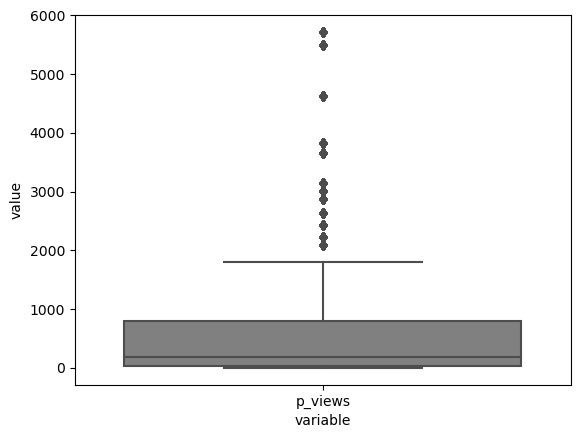

In [83]:
#Central Tendencies

#boxplot
sns.boxplot(data = df3d[['p_views']].melt(),
            x = 'variable', y = 'value', color = 'grey')

<Axes: xlabel='variable', ylabel='value'>

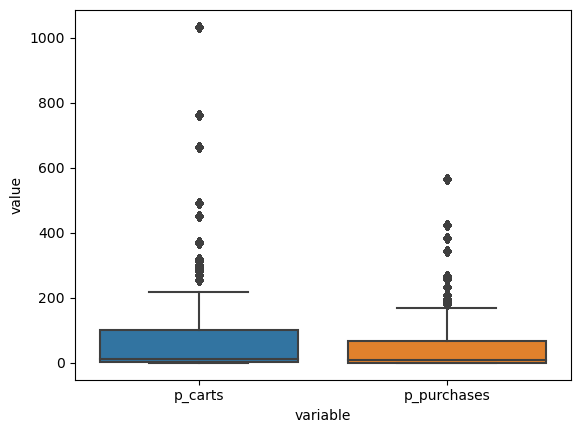

In [85]:
#comparison

sns.boxplot(data = df3d[[ 'p_carts', 'p_purchases']].melt(),
            x = 'variable', y = 'value')

<Axes: xlabel='variable', ylabel='value'>

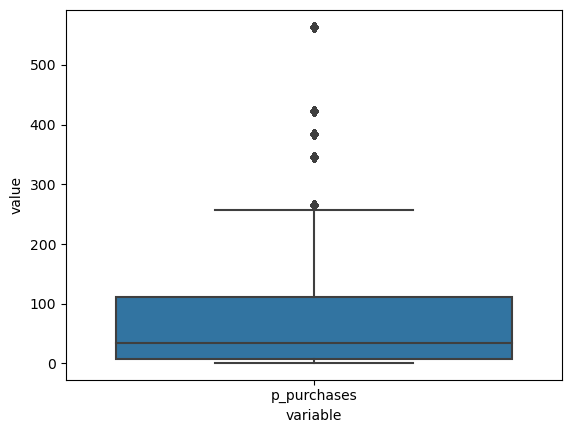

In [87]:
df = df3d[df3d['is_purchase'] == 1]['p_purchases']
df = df.to_frame()
df_melted = df.melt()
sns.boxplot(data = df_melted, x = 'variable', y = 'value')

<Axes: xlabel='variable', ylabel='value'>

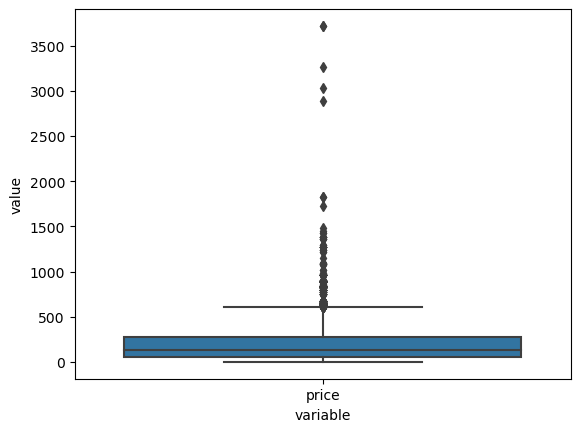

In [88]:
#distribution of purchased products prices
df = df3d[df3d['is_purchase'] == 1]['price']
df = df.to_frame()
df_melted = df.melt()
sns.boxplot(data = df_melted, x = 'variable', y = 'value')

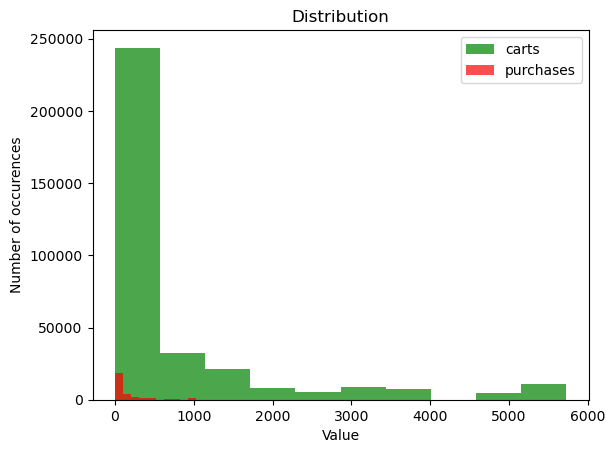

In [90]:
#histrogam
plt.hist(df3d[(df3d['is_view'] == 1) ]['p_views'], color = 'green', label = 'carts', alpha = 0.7)
plt.hist(df3d[(df3d['is_cart'] == 1) ]['p_carts'], color = 'red', label = 'purchases', alpha = 0.7 )
plt.title('Distribution')
plt.ylabel('Number of occurences')
plt.xlabel('Value')
plt.legend()
plt.show()

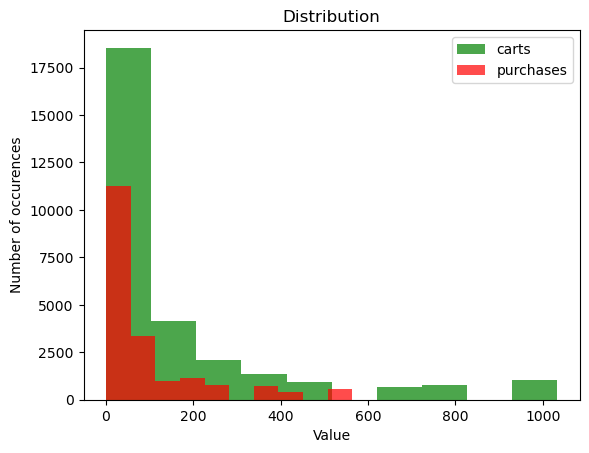

In [91]:
plt.hist(df3d[(df3d['is_cart'] == 1 )]['p_carts'], color = 'green', label = 'carts', alpha = 0.7)
plt.hist(df3d[df3d['is_purchase'] == 1]['p_purchases'], color = 'red', label = 'purchases', alpha = 0.7 )

plt.title('Distribution')
plt.ylabel('Number of occurences')
plt.xlabel('Value')
plt.legend()
plt.show()

In [93]:
#content based filtering : rating products
#calculate a rating score for each product on subsubcategory scale
def calculate_rating(group):
    #group['u_rating'] = ((group['user_purchases'] / group['user_purchases'].mean()) * 100) + ((group['user_carts'] / group['user_carts'].mean()) * 5) +(group['user_views'] / group['user_views'].mean())
    group['p_rating'] = ((group['p_purchases']  * 80) + (group['p_carts']  /20) + (group['p_views'] / 100) )/100
    group['p_rating'] = group['p_rating'].round().clip(0, 100)
    #group['u_rating'] = group['u_rating'].round().clip(0, 100)
    return group

df3d = df3d.groupby('subsubcategory').apply(calculate_rating)

In [94]:
df3d.head()

Date      Time event_type              user_id  \
subsubcategory                                                            
0              19  2020-09-24  12:04:15       view  1515915625519391247   
               22  2020-09-24  12:06:37       view  1515915625512189330   
               36  2020-09-24  12:14:48       view  1515915625519392599   
               58  2020-09-24  12:24:12       view  1515915625508706879   
               65  2020-09-24  12:29:17       view  1515915625519399850   

                  user_session  product_id  price     category subcategory  \
subsubcategory                                                               
0              19   t5aw8VKVBj     3149184   6.97  electronics   telephone   
               22   hbCbCVCiiR     1417423   9.21  electronics   telephone   
               36   UBdbsTPcnz     1829859   8.35   stationery    cartrige   
               58   mTvQNIrzuS     3698755  88.52   stationery    cartrige   
               65   jg7PxymyBu     1821803  30.48  electronics   telephone   

                  subsubcategory  ...  user_views  user_carts  user_purchases  \
subsubcategory                    ...                                           
0              19              0  ...           1           0               0   
               22              0  ...           1           0               0   
               36              0  ...           1           0               0   
               58              0  ...           1           0               0   
               65              0  ...           4           1               1   

                   user_views_count  user_carts_count  user_purchases_count  \
subsubcategory                                                                
0              19                 1                 0                     0   
               22                 1                 0                     0   
               36                 1                 0                     0   
               58                 1                 0                     0   
               65                 4                 1                     1   

                   p_views  p_carts  p_purchases  p_rating  
subsubcategory                                              
0              19        1        0            0       0.0  
               22        2        0            0       0.0  
               36       14        0            0       0.0  
               58       62        3            1       1.0  
               65       96       25           13      10.0  

[5 rows x 23 columns]

In [98]:
df3d[(df3d['subsubcategory'] == 'printer') & (df3d['user_purchases'] >= 1)].head()

Date      Time event_type              user_id  \
subsubcategory                                                             
printer        74   2020-09-24  12:36:19       view  1515915625519403099   
               336  2020-09-24  14:12:58       cart  1515915625519403099   
               338  2020-09-24  14:13:58   purchase  1515915625519403099   
               456  2020-09-24  15:11:36       view  1515915625390107328   
               477  2020-09-24  15:21:23       view  1515915625390107328   

                   user_session  product_id   price   category  subcategory  \
subsubcategory                                                                
printer        74    hOTzTiWHvR     3830296   13.89  computers  peripherals   
               336   hOTzTiWHvR     3830296   13.89  computers  peripherals   
               338   hOTzTiWHvR     3830296   13.89  computers  peripherals   
               456   M2BEyGvv0K     3790736  163.52  computers  peripherals   
               477   zs7tnfeZP8      608709  155.11  computers  peripherals   

                   subsubcategory  ...  user_views  user_carts  \
subsubcategory                     ...                           
printer        74         printer  ...           1           1   
               336        printer  ...           1           1   
               338        printer  ...           1           1   
               456        printer  ...          37           2   
               477        printer  ...          37           2   

                    user_purchases  user_views_count  user_carts_count  \
subsubcategory                                                           
printer        74                1                 1                 1   
               336               1                 1                 1   
               338               1                 1                 1   
               456              10                37                 2   
               477              10                37                 2   

                    user_purchases_count  p_views  p_carts  p_purchases  \
subsubcategory                                                            
printer        74                      1      149       29           24   
               336                     1      149       29           24   
               338                     1      149       29           24   
               456                    10     1061      136           94   
               477                    10      182       18           12   

                    p_rating  
subsubcategory                
printer        74       19.0  
               336      19.0  
               338      19.0  
               456      75.0  
               477      10.0  

[5 rows x 23 columns]

In [100]:
#collaborative filtering
d= df3d[(df3d['is_purchase'] == 1)]
d = d.loc[:, ['user_id', 'product_id', 'subsubcategory', 'p_rating']]
d = d.drop_duplicates(subset='user_id', keep='first')
d = d.drop_duplicates(subset='product_id', keep='first')
d = d.dropna()
d.head()

user_id  product_id subsubcategory  p_rating
subsubcategory                                                              
0              257  1515915625519426806      828590              0       2.0
               339  1515915625519436601     1040150              0       2.0
               442  1515915625519454753     3828207              0       6.0
               512  1515915625519045356     1703412              0      11.0
               544  1515915625519470141     3755038              0      43.0

In [101]:
monitors = d[d['subsubcategory'] == 'printer']

In [102]:
monitors.head()

user_id  product_id subsubcategory  p_rating
subsubcategory                                                               
printer        338   1515915625519403099     3830296        printer      19.0
               587   1515915625519475949     3760001        printer      34.0
               750   1515915625519495049     3829912        printer      98.0
               1574  1515915625519609613       59240        printer       4.0
               1894  1515915625420104051      665670        printer       6.0

In [103]:
monitors.sort_values(by='p_rating', ascending=False, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_5084\2291403111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monitors.sort_values(by='p_rating', ascending=False, inplace=True)


In [104]:
# creating a pivot table
monitors_matrix = monitors.pivot_table(values='p_rating', index='user_id', columns='product_id', fill_value=0)
monitors_matrix.head()

product_id,11014,11551,59240,123795,209957,277612,294113,356748,356749,371764,...,4057964,4078417,4099090,4101127,4101598,4102479,4102539,4155852,4183780,4183782
user_id,,,,,,,,,,,,,,,,,,,,,
1515915625355947830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1515915625363419728,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1515915625369332561,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1515915625373568793,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1515915625379210214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
transposed_matrix = monitors_matrix.T
transposed_matrix.head()

user_id,1515915625355947830,1515915625363419728,1515915625369332561,1515915625373568793,1515915625379210214,1515915625386662653,1515915625387433440,1515915625420104051,1515915625477767168,1515915625482081016,...,1515915625603606130,1515915625603792291,1515915625605457634,1515915625605903767,1515915625606190778,1515915625607596803,1515915625608197036,1515915625609035067,1515915625609564314,1515915625610057486
product_id,,,,,,,,,,,,,,,,,,,,,
11014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11551,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123795,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
209957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
transposed_matrix.shape

(222, 222)

In [107]:
import sklearn
from sklearn.decomposition import TruncatedSVD

In [108]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(transposed_matrix)
decomposed_matrix.shape

(222, 10)

In [109]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(222, 222)

In [110]:
print(correlation_matrix)

[[ 1.          0.31986827  0.95935464 ...  0.87479801 -0.87586169
  -0.65532335]
 [ 0.31986827  1.          0.2769554  ...  0.69314697  0.08464817
  -0.91071518]
 [ 0.95935464  0.2769554   1.         ...  0.88444353 -0.93371214
  -0.63913954]
 ...
 [ 0.87479801  0.69314697  0.88444353 ...  1.         -0.65951034
  -0.92022159]
 [-0.87586169  0.08464817 -0.93371214 ... -0.65951034  1.
   0.32180301]
 [-0.65532335 -0.91071518 -0.63913954 ... -0.92022159  0.32180301
   1.        ]]


In [111]:
# product id 
transposed_matrix.index[111]

1271390

In [112]:
# checking if product in the position is the same 
i = 1248293
products = list(transposed_matrix.index)
product_ID = products.index(i)
product_ID

108

In [113]:
correlation_product_ID = correlation_matrix[product_ID]

In [114]:
Recommend = list(transposed_matrix.index[correlation_product_ID > 0.7])

# Removes the item already bought by the customer
# Recommend.remove(i) 

Recommend[0:9]

[209957, 277612, 427706, 462233, 462236, 462239, 462242, 481159, 494235]

In [115]:
monitors[monitors["product_id"] == 462232]

,,user_id,product_id,subsubcategory,p_rating
subsubcategory,,,,,
printer,377983,1515915625595795951,462232,printer,4.0


In [116]:
df3d = pd.get_dummies(dff, columns=['category', 'subcategory','subsubcategory'])

In [117]:
df3d.head()

,Date,Time,event_type,user_id,user_session,product_id,price,is_view,is_cart,is_purchase,...,subsubcategory_mouse,subsubcategory_network_adapter,subsubcategory_player,subsubcategory_power_supply,subsubcategory_printer,subsubcategory_saw,subsubcategory_screw,subsubcategory_videocards,subsubcategory_videoregister,subsubcategory_wifi
0,2020-09-24,11:57:26,view,1515915625519380411,tdicluNnRY,139905,17.16,1,0,0,...,False,False,False,False,False,False,False,False,False,False
1,2020-09-24,11:57:33,view,1515915625519014356,aGFYrNgC08,635807,113.81,1,0,0,...,False,False,False,False,True,False,False,False,False,False
2,2020-09-24,11:57:59,view,1515915625519388062,vnkdP81DDW,664325,52.33,1,0,0,...,False,False,False,False,False,True,False,False,False,False
5,2020-09-24,12:00:00,view,1515915625519389483,63xjTFC54g,1080093,268.17,1,0,0,...,False,False,False,False,True,False,False,False,False,False
7,2020-09-24,12:00:10,view,1515915625519389538,FwLEmI1E0K,3537266,92.00,1,0,0,...,False,False,True,False,False,False,False,False,False,False


In [118]:
df3d.drop(columns = ['Date','Time','user_id', 'event_type', 'user_session'], inplace = True)

In [119]:
col_a = df3d.pop('is_purchase')

# Add the 'a' column back to the DataFrame in the last position
df3d = df3d.assign(**{'is_purchase': col_a})

In [120]:
df3d = df3d.reset_index(drop=True)

In [121]:
df3d.head()

,product_id,price,is_view,is_cart,user_views,user_carts,user_purchases,user_views_count,user_carts_count,user_purchases_count,...,subsubcategory_network_adapter,subsubcategory_player,subsubcategory_power_supply,subsubcategory_printer,subsubcategory_saw,subsubcategory_screw,subsubcategory_videocards,subsubcategory_videoregister,subsubcategory_wifi,is_purchase
0,139905,17.16,1,0,2,0,0,2,0,0,...,False,False,False,False,False,False,False,False,False,0
1,635807,113.81,1,0,1,0,0,1,0,0,...,False,False,False,True,False,False,False,False,False,0
2,664325,52.33,1,0,1,0,0,1,0,0,...,False,False,False,False,True,False,False,False,False,0
3,1080093,268.17,1,0,1,0,0,1,0,0,...,False,False,False,True,False,False,False,False,False,0
4,3537266,92.00,1,0,1,0,0,1,0,0,...,False,True,False,False,False,False,False,False,False,0


In [122]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import joblib

In [123]:
# Create a logistic regression model
model = LogisticRegression()

# Split the data into features and labels
X = df3d.drop("is_purchase", axis=1)
y = df3d["is_purchase"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [124]:
# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9510959708081349


In [125]:
from sklearn.metrics import classification_report

target_names = ["class 0", "class 1"]

report = classification_report(y_test, y_pred, target_names=target_names, zero_division=0)
print(report)

              precision    recall  f1-score   support

     class 0       0.95      1.00      0.97     74545
     class 1       0.00      0.00      0.00      3833

    accuracy                           0.95     78378
   macro avg       0.48      0.50      0.49     78378
weighted avg       0.90      0.95      0.93     78378



In [126]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

MSE: 0.04890402919186507
MAE: 0.04890402919186507
R2: -0.051418606211013795


In [127]:
#undersampling
from sklearn.utils import resample

In [128]:
# model = LogisticRegression()
model = LogisticRegression(C=1, penalty='l1', solver='liblinear')


# Separate majority and minority classes
df_majority = df3d[df3d.is_purchase==0]
df_minority = df3d[df3d.is_purchase==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority),     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.is_purchase.value_counts()

# Split the data into features and labels
X = df_downsampled.drop("is_purchase", axis=1)
y = df_downsampled["is_purchase"]

In [129]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = model.predict(X_test)



# Save the trained model to disk
joblib.dump(model, 'logistic_regression.joblib')


# Evaluate the model's performance
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [130]:
from sklearn.metrics import classification_report

target_names = ["class 0", "class 1"]
report = classification_report(y_test, y_pred, target_names=target_names, zero_division = 0)
print(report)

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      3877
     class 1       1.00      1.00      1.00      3826

    accuracy                           1.00      7703
   macro avg       1.00      1.00      1.00      7703
weighted avg       1.00      1.00      1.00      7703



In [131]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

MSE: 0.0
MAE: 0.0
R2: 1.0


In [132]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier

In [139]:
# Split the data into features and labels
X = df3d.drop("is_purchase", axis=1)
y = df3d["is_purchase"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [141]:
# Convert data to NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Create the model with 5 neighbors
model = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9578070376891474


In [142]:
target_names = ["class 0", "class 1"]
report = classification_report(y_test, y_pred, target_names=target_names)
print(report)

              precision    recall  f1-score   support

     class 0       0.97      0.99      0.98     74639
     class 1       0.60      0.35      0.44      3739

    accuracy                           0.96     78378
   macro avg       0.78      0.67      0.71     78378
weighted avg       0.95      0.96      0.95     78378



In [143]:
se = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

MSE: 0.0
MAE: 0.04219296231085253
R2: 0.07123231840063671


In [146]:
from sklearn.model_selection import GridSearchCV

In [147]:
# Define the parameter grid for the number of neighbors
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13]}

In [148]:
# Create the KNN model
knn = KNeighborsClassifier()

In [150]:
# Create the grid search object
grid_search = GridSearchCV(knn, param_grid, cv=5)

In [ ]:
# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

In [ ]:
# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Use the best parameters to create a new KNN model
best_knn = KNeighborsClassifier(**best_params)

# Fit the new KNN model to the training data
best_knn.fit(X_train, y_train)

In [ ]:
# Predict the labels for the test data
y_pred = best_knn.predict(X_test)

# Evaluate the performance of the best KNN model
accuracy = best_knn.score(X_test, y_test)
print("Accuracy:", accuracy)